In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import nnfs.datasets
import nnfs

In [2]:
from model.neural_network import NeuralNetwork

from model.layers.dense import DenseLayer
from model.layers.dropout import DropoutLayer
from model.optimizers.adam import Adam

# Regression Testing

In [19]:
x, y = nnfs.datasets.sine_data()

model = NeuralNetwork([
    DenseLayer(1, 64, activation='Relu'),
    DenseLayer(64, 64, activation='Relu'),
    DenseLayer(64, 1)
])

model.set(
    loss='MeanSquaredError',
    optimizer=Adam(learning_rate=0.005, decay=1e-3)
)

model.train(x, y, epochs=1000)

epoch: 0, loss: 0.500, lr: 0.0050000000
epoch: 100, loss: 0.079, lr: 0.0045495905
epoch: 200, loss: 0.014, lr: 0.0041701418
epoch: 300, loss: 0.001, lr: 0.0038491147
epoch: 400, loss: 0.000, lr: 0.0035739814
epoch: 500, loss: 0.000, lr: 0.0033355570
epoch: 600, loss: 0.000, lr: 0.0031269543
epoch: 700, loss: 0.000, lr: 0.0029429076
epoch: 800, loss: 0.000, lr: 0.0027793218
epoch: 900, loss: 0.000, lr: 0.0026329647
epoch: 1000, loss: 0.000, lr: 0.0025012506


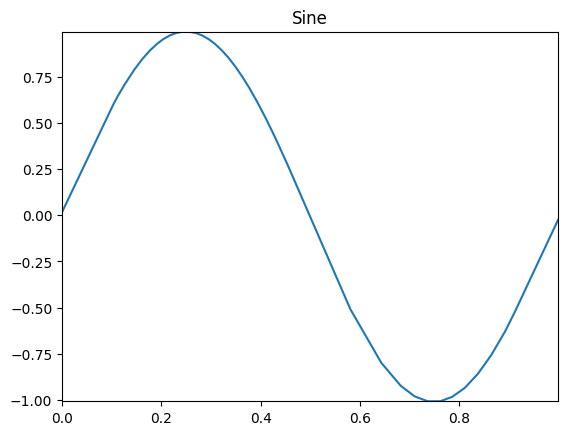

In [20]:
x_test, y_test = nnfs.datasets.sine_data()

outputs = model.forward(x_test)
plt.xlim(x_test.min(), x_test.max())
plt.ylim(outputs.min(), outputs.max())
plt.title(f"Sine")
plt.plot(x_test, outputs)
plt.show()

# Classification Testing

In [30]:
x, y = nnfs.datasets.spiral_data(1000, classes=2)
y = y.reshape(-1, 1)

model = NeuralNetwork([
    DenseLayer(2, 256, activation='Relu', weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4),
    DropoutLayer(rate=0.01),
    DenseLayer(256, 128, activation='Relu'),
    DropoutLayer(rate=0.01),
    DenseLayer(128, 1, activation='Sigmoid')
])

model.set(
    loss='BinaryCrossentropy',
    optimizer=Adam(decay=5e-7)
)

model.train(x, y, epochs=2000)

epoch: 0, loss: 0.693, lr: 0.0010000000
epoch: 100, loss: 0.646, lr: 0.0009999505
epoch: 200, loss: 0.486, lr: 0.0009999005
epoch: 300, loss: 0.359, lr: 0.0009998505
epoch: 400, loss: 0.280, lr: 0.0009998005
epoch: 500, loss: 0.236, lr: 0.0009997506
epoch: 600, loss: 0.209, lr: 0.0009997006
epoch: 700, loss: 0.186, lr: 0.0009996506
epoch: 800, loss: 0.155, lr: 0.0009996007
epoch: 900, loss: 0.148, lr: 0.0009995507
epoch: 1000, loss: 0.124, lr: 0.0009995007
epoch: 1100, loss: 0.109, lr: 0.0009994508
epoch: 1200, loss: 0.117, lr: 0.0009994009
epoch: 1300, loss: 0.101, lr: 0.0009993509
epoch: 1400, loss: 0.098, lr: 0.0009993010
epoch: 1500, loss: 0.089, lr: 0.0009992511
epoch: 1600, loss: 0.081, lr: 0.0009992011
epoch: 1700, loss: 0.080, lr: 0.0009991512
epoch: 1800, loss: 0.079, lr: 0.0009991013
epoch: 1900, loss: 0.084, lr: 0.0009990514
epoch: 2000, loss: 0.075, lr: 0.0009990015


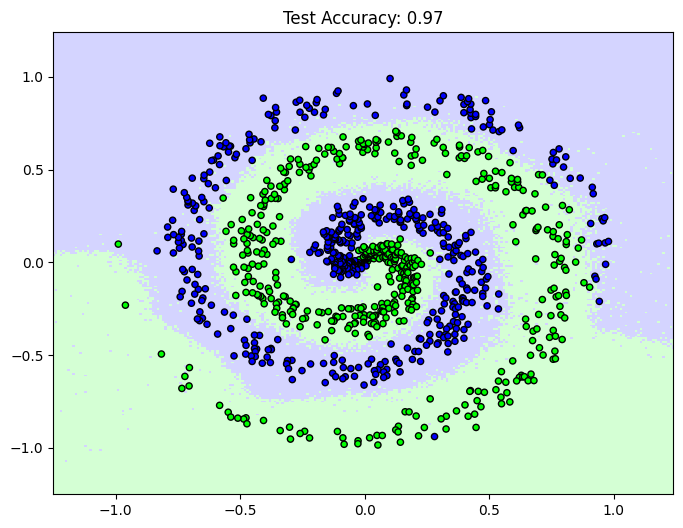

In [32]:
x_test, y_test = nnfs.datasets.spiral_data(samples=500, classes=2)
outputs = model.forward(x_test)

h = 0.01
x_min, x_max = -1.25, 1.25
y_min, y_max = -1.25, 1.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_outputs = model.forward(grid_points)
z = (grid_outputs > 0.5).astype(int).reshape(xx.shape)

cmap_light = ListedColormap(['#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#00FF00', '#0000FF'])
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, z, cmap=cmap_light, alpha=0.5)

predictions = (outputs > 0.5).astype(int).flatten()
accuracy = np.mean(predictions == y_test.flatten())

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Test Accuracy: {accuracy:.2f}")
plt.show()

In [34]:
x, y = nnfs.datasets.spiral_data(500, classes=3)

model = NeuralNetwork([
    DenseLayer(2, 512, activation='Relu', weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4),
    DropoutLayer(rate=0.01),
    DenseLayer(512, 256, activation='Relu'),
    DropoutLayer(rate=0.01),
    DenseLayer(256, 3, activation='Softmax')
])

model.set(
    loss='CategoricalCrossentropy',
    optimizer=Adam(decay=5e-7)
)

model.train(x, y, epochs=2000)

epoch: 0, loss: 1.099, lr: 0.0010000000
epoch: 100, loss: 0.975, lr: 0.0009999505
epoch: 200, loss: 0.708, lr: 0.0009999005
epoch: 300, loss: 0.573, lr: 0.0009998505
epoch: 400, loss: 0.462, lr: 0.0009998005
epoch: 500, loss: 0.385, lr: 0.0009997506
epoch: 600, loss: 0.343, lr: 0.0009997006
epoch: 700, loss: 0.314, lr: 0.0009996506
epoch: 800, loss: 0.301, lr: 0.0009996007
epoch: 900, loss: 0.278, lr: 0.0009995507
epoch: 1000, loss: 0.275, lr: 0.0009995007
epoch: 1100, loss: 0.262, lr: 0.0009994508
epoch: 1200, loss: 0.257, lr: 0.0009994009
epoch: 1300, loss: 0.245, lr: 0.0009993509
epoch: 1400, loss: 0.250, lr: 0.0009993010
epoch: 1500, loss: 0.244, lr: 0.0009992511
epoch: 1600, loss: 0.250, lr: 0.0009992011
epoch: 1700, loss: 0.255, lr: 0.0009991512
epoch: 1800, loss: 0.238, lr: 0.0009991013
epoch: 1900, loss: 0.235, lr: 0.0009990514
epoch: 2000, loss: 0.239, lr: 0.0009990015


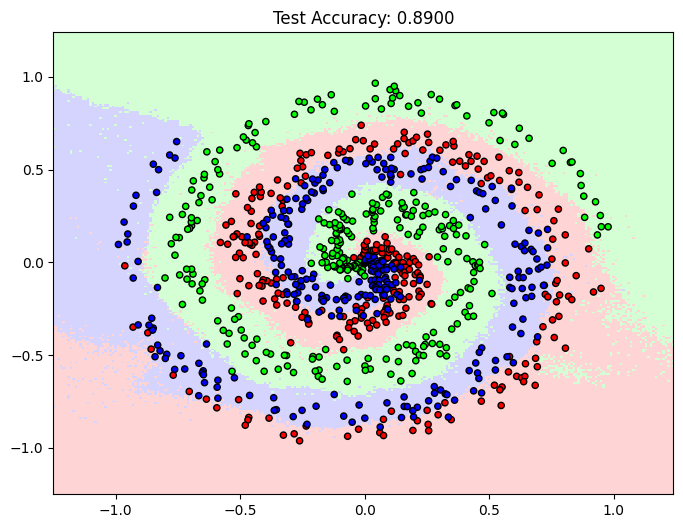

In [35]:
x_test, y_test = nnfs.datasets.spiral_data(samples=300, classes=3)
outputs = model.forward(x_test)

h = 0.01
x_min, x_max = -1.25, 1.25
y_min, y_max = -1.25, 1.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_outputs = model.forward(grid_points)
z = np.argmax(grid_outputs, axis=1)
z = z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, z, cmap=cmap_light, alpha=0.5)

predictions = np.argmax(outputs, axis=1)
accuracy = np.mean(predictions == y_test)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Test Accuracy: {accuracy:.4f}")
plt.show()